<a href="https://colab.research.google.com/github/MingyuKIM615/ITWILL_PYTHON/blob/master/ml12_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image # 이미지 모듈의 imread(), imsave() 함수들 사용

from sklearn import datasets # datasets 모듈의 함수들 사용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Python에서 이미지 파일 다루기

In [ ]:
# scikit-learn 패키지의 예제 데이터 셋에서 제공하는 이미지 파일
china = datasets.load_sample_image('china.jpg')

In [ ]:
type(china) # jpg 형식이 아니라 numpy의 ndarray 타입

numpy.ndarray

In [ ]:
china.shape # (height, width, RGB)

(427, 640, 3)

In [ ]:
china[:,:,0] # 이미지에 Red 색깔의 키기

array([[174, 174, 174, ..., 250, 250, 250],
       [172, 173, 173, ..., 251, 251, 251],
       [174, 174, 174, ..., 252, 252, 252],
       ...,
       [ 88, 147, 122, ...,  39,   8,   6],
       [122, 129, 118, ...,   9,   9,  16],
       [116, 104, 108, ...,  43,  13,  15]], dtype=uint8)

이미지의 정보를 저장하고 있는 배열(ndarray)의 모양(shape)

* (height, width): height x width 크기의 흑백 이미지
* (height, width, 3): height x width x RGB 크기의 컬러 이미지(jpg)
* (height, width, 4): height x width x RGBA 크기의 컬러 이미지(png)


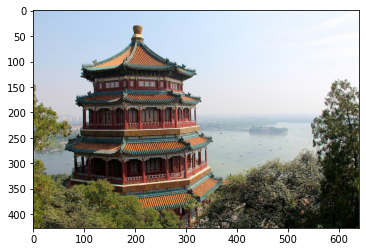

In [ ]:
plt.imshow(china)
# plt.axis('off')
plt.show()

In [ ]:
# matplotlib.imgage 모듈의 imsave(file_name, array) 함수: 배열을 이미지 파일 형식으로 저장
image.imsave('china_copy.jpg', china)

In [ ]:
# matplotlib.image 모듈의 imread(file_name) 함수: 이미지 파일을 읽어서 배열을 생성
arr = image.imread('china_copy.jpg')

In [ ]:
arr.shape

(427, 640, 3)

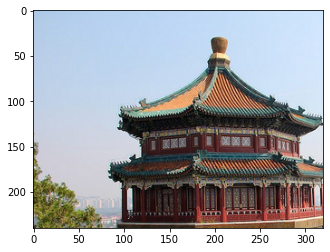

In [ ]:
# 이미지 자르기 - ndarray의 slicing
china_cropped = china[:240, :320, :]
plt.imshow(china_cropped)
plt.show()

# MNIST datasets

70,000개 숫자 손글씨 흑백 이미지(28, 28)가 배열 형태로 저장된 데이터 셋.

In [ ]:
mnist = datasets.fetch_openml('mnist_784', as_frame=False)

In [ ]:
type(mnist)

sklearn.utils.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
# 특성 행렬(2차원 배열), 타겟 (1차원) 배열
X, y = mnist['data'], mnist['target']

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

* X의 shape: (70_000, 784)
    * (샘플 개수, 이미지 1개의 픽셀 개수)
    * scikit-learn의 머신 러닝 모델들을 훈련 시킬 때 특성 배열은 2차원 배열이어야 하기 때문에.
    * 28x28 크기의 2차원 배열을 1차원 배열로 reshape
    * 이미지를 콘솔에 출력하려면 1차원 배열을 2차원 배열로 reshape.

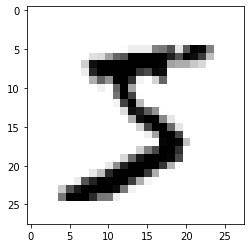

In [ ]:
img_0 = X[0].reshape(28,28)
plt.imshow(img_0, cmap=plt.cm.binary) # cmap: color map
plt.show()

In [ ]:
y[0]

'5'

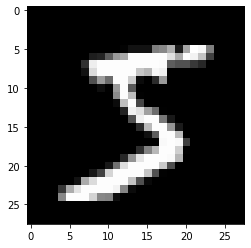

In [ ]:
plt.imshow(img_0, cmap=plt.cm.gray)
plt.show()

In [ ]:
# 2차원 배열 X에서 첫 100개 이미지를 시각화
def plot_images(arr):
  flg, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10)) # 10x10의 subplot을 생성
  for i in range(10): # subplot의 row 인덱스 0 ~ 9까지 반복
    for j in range(10): # subplot의 column 인덱스 0 ~ 9까지 반복
      idx = i * 10 + j
      img = arr[idx].reshape(28, 28) # 2차원 배열로 변환 -> 시각화
      ax[i, j].imshow(img, cmap=plt.cm.binary) # subplot에 숫자 이미지 출력
      ax[i, j].axis('off') # subplot의 좌표측 제거


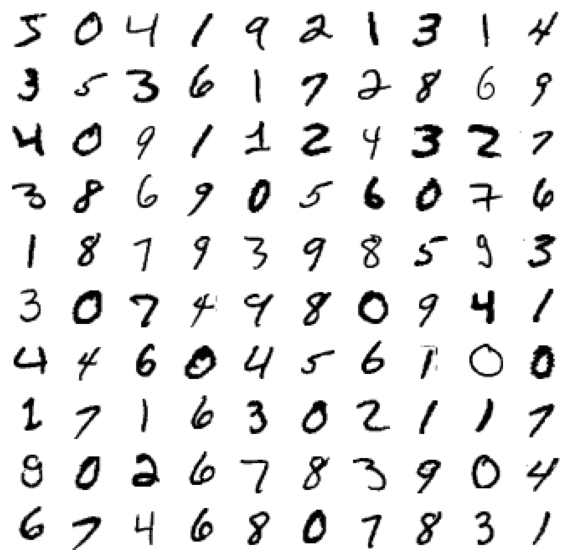

In [ ]:
plot_images(X[:100])
plt.show()

In [ ]:
y[:20]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9'], dtype=object)

# 훈련/테스트 셋 분리

MNIST 데이터 셋은 이미지 데이터들이 무작위하게 섞여 있어서 순차 추출(sequential sampling)을 사용해도 됨.

In [ ]:
train_size = 60_000 # 훈련 셋 샘플 개수(테스트 셋 샘플 개수: 10_000)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

# KNN 분류기

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1) # 모델 생성  

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
train_pred = knn.predict(X_train)

KNN

* 훈련에 소요되는 시간이 거의 없음.
* 훈련 샘플이 많을 수록 예측할 때 시간이 많이 소요됨.


In [ ]:
accuracy_score(y_train, train_pred)

0.9819166666666667

# 틀린 예측 분석

In [ ]:
conf_mat = confusion_matrix(y_train, train_pred)

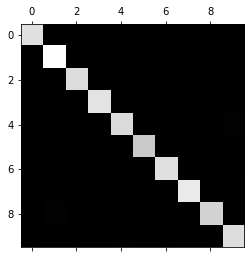

In [ ]:
# confusion matrix 시각화
plt.matshow(conf_mat, cmap=plt.cm.gray) # cmap='gray': 0.0(black) ~ 1.0(white)
plt.show()

In [ ]:
# 틀린 개수가 많을 수록 더 밝게 시각화하는 confusion matrix
conf_mat_normed =  conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
np.fill_diagonal(conf_mat_normed, 0) # 대각선의 숫자들을 모두 0으로 설정.

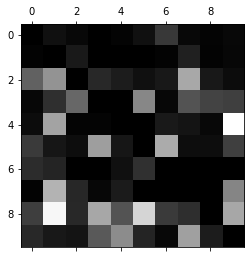

In [ ]:
plt.matshow(conf_mat_normed, cmap=plt.cm.gray)
plt.show()

In [ ]:
print(y_train[:20])
print(train_pred[:20])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']
['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


In [ ]:
# 틀린 예측들을 시각화
X_wrong = X_train[y_train != train_pred] # 예측이 틀린 훈련 샘플들
y_wrong = y_train[y_train != train_pred] # 예측이 틀린 레이블

In [ ]:
X_wrong.shape, y_wrong.shape

((1085, 784), (1085,))

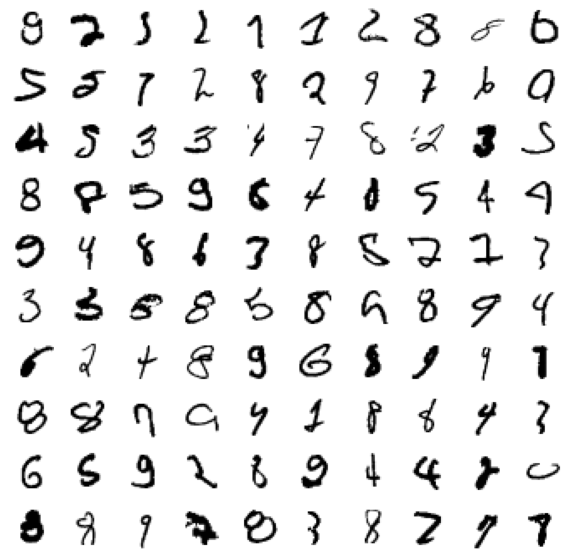

In [ ]:
plot_images(X_wrong[:100])
plt.show()

In [ ]:
print(y_wrong[:10])

['9' '2' '5' '2' '7' '1' '2' '8' '8' '6']


In [ ]:
test_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, test_pred)

0.9688

# LogisticRegression

In [ ]:
log_reg = LogisticRegression(random_state=42, n_jobs=-1)

In [ ]:
cv = cross_validate(estimator=log_reg, X=X_train, y=y_train,
                    cv=5, n_jobs=-1, return_train_score=True)

In [ ]:
print(cv['train_score']) # 훈련 셋의 평가 점수들
print(np.mean(cv['train_score']))

[0.93420833 0.93595833 0.936      0.93833333 0.93377083]
0.9356541666666667


In [ ]:
np.mean(cv['test_score']) # 검증 셋의 평가 점수들의 평균 -> 테스트 셋에서의 일반화 성능 예상

0.9180333333333334

In [ ]:
# LogisitcRegression 훈련
log_reg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [ ]:
train_pred = log_reg.predict(X_train)

In [ ]:
conf_mat_2 = confusion_matrix(y_train, train_pred)
print(conf_mat_2)

[[5764    0   15    9   14   36   33   10   38    4]
 [   1 6584   32   19    6   20    3   10   55   12]
 [  28   47 5445   89   61   20   56   51  140   21]
 [  17   23  118 5582    6  162   14   50  119   40]
 [  13   22   23    9 5491    8   48   15   42  171]
 [  57   18   40  161   48 4793   82   15  160   47]
 [  34    9   40    0   35   58 5713    4   21    4]
 [  11   20   58   28   42    8    4 5896   20  178]
 [  27   93   55  122   19  136   36   18 5293   52]
 [  21   22   14   70  129   33    3  138   45 5474]]


# Decision Tree, SVM, Random Forest 분류기 비교

In [ ]:
# DecisionTree
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_pred = tree.predict(X_train)

In [ ]:
confusion_matrix(y_train, train_pred)

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5958,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6131,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5842,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5851,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5949]])

In [ ]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
train_pred = svm.predict(X_train)

In [ ]:
confusion_matrix(y_train, train_pred)